# BRL 問卷資料視覺化：繪製有堆疊的長條圖

In [4]:
# import packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# 讀取資料
data = pd.read_csv("BRL問卷資料.csv", encoding="Big5")
print(data)

             單位  身分  年級  #1  #2  #3  #4  #5  #6  #7      #8
0    醫學檢驗生物技術學系  學生  大二   4   4   4   4   3   4   3     NaN
1    醫學檢驗生物技術學系  學生  大二   3   4   4   3   3   3   4     NaN
2    醫學檢驗生物技術學系  學生  大二   5   4   4   5   5   4   4     NaN
3    醫學檢驗生物技術學系  學生  大二   5   5   4   5   5   4   4     NaN
4    醫學檢驗生物技術學系  學生  大二   5   5   5   5   5   5   5     NaN
5    醫學檢驗生物技術學系  學生  大二   4   4   4   4   4   4   4     NaN
6    醫學檢驗生物技術學系  學生  大二   5   5   5   5   5   5   5     NaN
7    醫學檢驗生物技術學系  學生  大二   4   4   4   4   4   3   5     NaN
8    醫學檢驗生物技術學系  學生  大二   4   4   4   4   4   4   4     NaN
9    醫學檢驗生物技術學系  學生  大二   5   5   5   5   5   5   5     NaN
10   醫學檢驗生物技術學系  學生  大二   5   5   5   5   5   5   5     NaN
11   醫學檢驗生物技術學系  學生  大二   4   4   4   4   4   4   4     NaN
12   醫學檢驗生物技術學系  學生  大二   4   4   5   3   4   4   4     NaN
13   醫學檢驗生物技術學系  學生  大二   5   4   4   4   4   4   4     NaN
14   醫學檢驗生物技術學系  學生  大二   4   4   4   4   4   4   4     NaN
15   醫學檢驗生物技術學系  學生  大二   4   4   4   4 

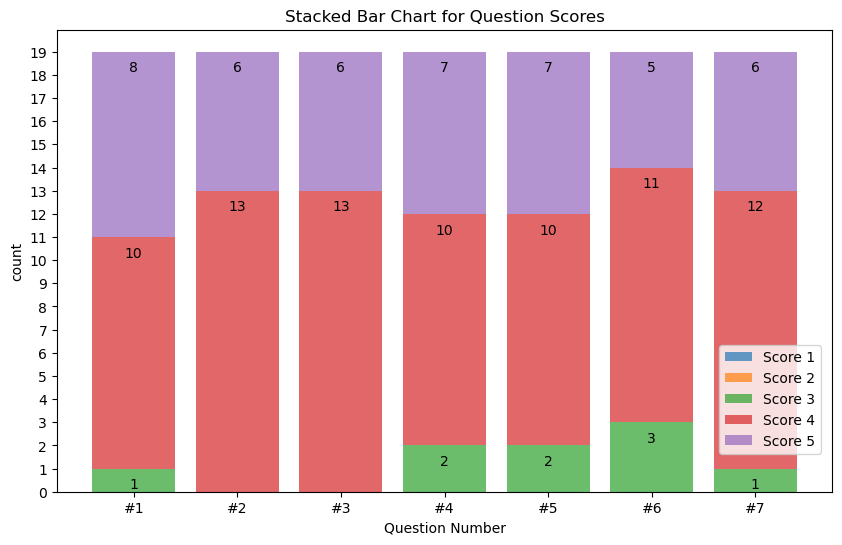

In [6]:
# 創建一個用於繪圖的DataFrame
plot_data = data.iloc[:, 3:10]

# 設定圖片大小
plt.figure(figsize=(10, 6))

# 設置灰階風格
# plt.style.use('grayscale')

# 切換回彩色風格（默認風格）
plt.style.use('default')

# 初始化底部位置，變數 bottom 用於紀錄堆疊的底部位置
bottom = [0] * len(plot_data.columns)
for i in range(1, 6):

    # .apply() 用於在 DataFrame 或 Series 上應用自定義函數
    # lambda x: (x == i).sum() 會計算每個問題中，每個分數出現的次數，並回傳一個 Series，儲存於 count 中
    # axis=0 表示針對 row 方向計算
    count = plot_data.apply(lambda x: (x == i).sum(), axis=0)

    # plt.bar(橫軸, 縱軸, label=每個分數的標籤, bottom=指定底部起始位置, alpha=透明度)
    # lable 用於設定圖例標籤，指定一次作圖的標籤
    plt.bar(plot_data.columns, count, label=f'Score {i}', bottom=bottom, alpha=0.7)

    # 在每個柱子的頂部顯示數值
    for x, y, count_value in zip(plot_data.columns, bottom + count, count):
        # 只顯示大於0的數值
        if count_value>0:
            # zip() 用於將多個可迭代對象中的元素依序取出，並組成一個 tuple，傳回一個 zip object
            # plt.text(x, y, str(count_value), ha='center', va='bottom') 會在座標 (x, y) 的位置顯示文字 str(count_value)
            # ha：Horizontal Alignment（水平對齊）；va：Vertical Alignment（垂直對齊）
            plt.text(x, y-1, str(count_value), ha='center', va='bottom')

    # 更新 bottom=下一個堆疊底部的起始位置；注意因為 bottom 被賦值為 count，所以 bottom 也會變成一個 Series
    if bottom is None:
        bottom = count
    else:
        bottom += count

plt.xlabel('Question Number')
plt.ylabel('count')
plt.title('Stacked Bar Chart for Question Scores')

# 顯示圖例
# bbox_to_anchor=(0.92, 0.2) 表示圖例的位置，(0.92, 0.2) 表示圖例的左下角位於 (0.92, 0.2) 的位置
plt.legend(loc='center', bbox_to_anchor=(0.92, 0.2))

# 設定 y 軸刻度為 1
# range(0, max(bottom) + 1, 1) 是一個用於生成刻度位置的範圍。這個範圍包括以下三個參數：
# 第一個參數 0 是起始刻度的位置，表示從0開始。
# 第二個參數 max(bottom) + 1 是結束刻度的位置。max(bottom) 表示堆疊中最高的位置，加1是為了確保這個位置也包含在內。這確保了刻度涵蓋了堆疊的整個高度範圍。
# 第三個參數 1 是刻度的間隔，表示每個刻度之間的距離。在這裡，我們將刻度設置為每隔1個單位。
plt.yticks(range(0, max(bottom) + 1, 1))

plt.show()

---
## 以下僅為功能探索

In [7]:
# 建構針對某個 column 中某數字出現次數的方法
def count_num(data, column, num):
    column_data = data[column]
    count = len(column_data[column_data == num])
    return count

# 測試能否正常運作
print(count_num(data, '#1', 3))

1


In [8]:
# 建構一個能夠產生 array 的方法；紀錄某 column 中，1~5 種數字依序分別出現幾次
all_count = []
for q in ['#1', '#2', '#3', '#4', '#5', '#6', '#7']:
    count_list = []
    for i in range(1, 6):
        count_list.append(count_num(data, q, i))
        ##print(count_list)        # 檢查行
    all_count.append(count_list)
all_count = pd.DataFrame(all_count)
print(all_count)

   0  1  2   3  4
0  0  0  1  10  8
1  0  0  0  13  6
2  0  0  0  13  6
3  0  0  2  10  7
4  0  0  2  10  7
5  0  0  3  11  5
6  0  0  1  12  6


In [9]:
# 自動生成變數名稱
var_names = [f'data{i}' for i in range(1, 6)]
var_dict = {name: [] for name in var_names}
print(var_dict)
print(var_dict.keys())

{'data1': [], 'data2': [], 'data3': [], 'data4': [], 'data5': []}
dict_keys(['data1', 'data2', 'data3', 'data4', 'data5'])


In [10]:
# 將 all_count 中的資料，依序放入 var_dict 中
for i, q_index in enumerate(var_dict.keys()):    
    var_dict[q_index] = all_count.loc[:, i]

print(var_dict)

{'data1': 0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: 0, dtype: int64, 'data2': 0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: 1, dtype: int64, 'data3': 0    1
1    0
2    0
3    2
4    2
5    3
6    1
Name: 2, dtype: int64, 'data4': 0    10
1    13
2    13
3    10
4    10
5    11
6    12
Name: 3, dtype: int64, 'data5': 0    8
1    6
2    6
3    7
4    7
5    5
6    6
Name: 4, dtype: int64}


In [11]:
data.loc[0:3, '#1':'#5']

,#1,#2,#3,#4,#5
0,4,4,4,4,3
1,3,4,4,3,3
2,5,4,4,5,5
3,5,5,4,5,5


In [12]:
data.loc[0:3]

,單位,身分,年級,#1,#2,#3,#4,#5,#6,#7,#8
0,醫學檢驗生物技術學系,學生,大二,4,4,4,4,3,4,3,NaN
1,醫學檢驗生物技術學系,學生,大二,3,4,4,3,3,3,4,NaN
2,醫學檢驗生物技術學系,學生,大二,5,4,4,5,5,4,4,NaN
3,醫學檢驗生物技術學系,學生,大二,5,5,4,5,5,4,4,NaN


In [13]:
data.loc[[0, 1, 2, 3]]

,單位,身分,年級,#1,#2,#3,#4,#5,#6,#7,#8
0,醫學檢驗生物技術學系,學生,大二,4,4,4,4,3,4,3,NaN
1,醫學檢驗生物技術學系,學生,大二,3,4,4,3,3,3,4,NaN
2,醫學檢驗生物技術學系,學生,大二,5,4,4,5,5,4,4,NaN
3,醫學檢驗生物技術學系,學生,大二,5,5,4,5,5,4,4,NaN


In [14]:
excep8 = data.iloc[:, :10]
excep8

,單位,身分,年級,#1,#2,#3,#4,#5,#6,#7
0,醫學檢驗生物技術學系,學生,大二,4,4,4,4,3,4,3
1,醫學檢驗生物技術學系,學生,大二,3,4,4,3,3,3,4
2,醫學檢驗生物技術學系,學生,大二,5,4,4,5,5,4,4
3,醫學檢驗生物技術學系,學生,大二,5,5,4,5,5,4,4
4,醫學檢驗生物技術學系,學生,大二,5,5,5,5,5,5,5
5,醫學檢驗生物技術學系,學生,大二,4,4,4,4,4,4,4
6,醫學檢驗生物技術學系,學生,大二,5,5,5,5,5,5,5
7,醫學檢驗生物技術學系,學生,大二,4,4,4,4,4,3,5
8,醫學檢驗生物技術學系,學生,大二,4,4,4,4,4,4,4
9,醫學檢驗生物技術學系,學生,大二,5,5,5,5,5,5,5


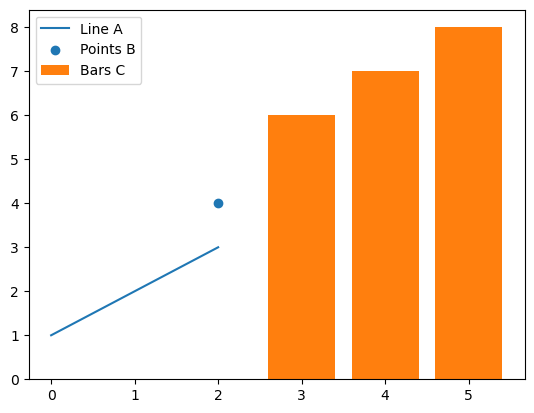

In [15]:
import matplotlib.pyplot as plt

# 創建一個示例圖表
plt.plot([1, 2, 3], label='Line A')
plt.scatter([2, 3, 4], [4, 5, 6], label='Points B')
plt.bar([3, 4, 5], [6, 7, 8], label='Bars C')

# 添加圖例
plt.legend()

# 顯示圖表
plt.show()
